In [1]:
import pandas as pd
import numpy as np
from functions.dataframe_functions import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_first = "../matlab_report-master/Treadmill/Test/Torsby/"
skier_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
path_second = "/CSV/csvData.csv"
filepath_list = [path_first + str(i) + path_second for i in skier_list]

main_df, df_peaks, df_info = get_dataframe(filepath_list, skier_list)

# df_info

In [7]:
df_info

,Gear,Stroke time,Ground contact time,Air time,Frequency,Force area,Skier,Peak time,Pole,Time to other pole,Other pole index
0,3,1.169263,0.509679,0.659584,0.855239,18.356453,1,3.098048,0,0.109931,0
1,3,1.029351,0.309805,0.719547,0.971485,11.082013,1,4.097419,0,0.129918,1
2,3,0.889440,0.239849,0.649591,1.124303,8.734623,1,5.056814,0,0.339786,2
3,3,0.949402,0.279824,0.669578,1.053295,13.331998,1,5.956247,0,0.119924,3
4,3,0.989377,0.369767,0.619610,1.010737,25.082068,1,7.035567,0,0.119924,4
...,...,...,...,...,...,...,...,...,...,...,...
17206,0,1.481941,0.380498,1.101443,0.674791,12.349700,10,988.895427,1,0.450590,848
17207,0,1.662177,0.400525,1.261653,0.601620,10.205823,10,990.377368,1,0.440577,849
17208,0,1.592086,0.400525,1.191561,0.628107,23.290517,10,992.069585,1,0.450590,850
17209,0,1.662177,0.400525,1.261653,0.601620,18.639898,10,993.731763,1,0.470616,851


In [231]:
data = df_info

#X_train = df_info[df_info.columns.difference(['Gear'])]
#X_valid = df_info['Gear']
#y_train = data[lst[2]]
#y_valid = data[lst[3]]

sc = StandardScaler()
data = sc.fit_transform(data)
data = pd.DataFrame(data)
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [46]:
#Converting the Training set into a Pandas Dataframe for easier analysis of some aspects
df = df_info[df_info.columns.difference(['Gear'])]
dv = pd.DataFrame(df_info['Gear'])

#Using the describe feature to view the composition of each of the variables
print(df.describe())

           Air time    Force area     Frequency  Ground contact time  \
count  17211.000000  17211.000000  17211.000000         17211.000000   
mean       0.781177     29.354528      0.888619             0.374772   
std        0.170910     12.996641      0.137953             0.104024   
min        0.146104      1.506087      0.211998             0.029983   
25%        0.680041     19.337199      0.787354             0.309805   
50%        0.739571     27.870088      0.903991             0.354821   
75%        0.814000     37.138654      0.987867             0.419736   
max        4.047450     89.888448      1.570854             1.304501   

       Other pole index     Peak time          Pole         Skier  \
count      17211.000000  17211.000000  17211.000000  17211.000000   
mean         430.355296    473.283312      0.499971      5.515019   
std          249.408332    285.139564      0.500015      2.848763   
min            0.000000      2.252951      0.000000      1.000000   
25%   

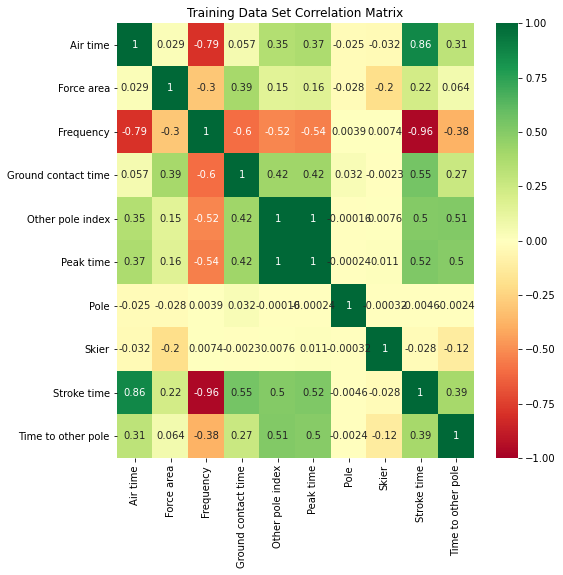

In [47]:
# Creating a correlation matric to visualize the correlation between variables
# This will help us perform some feature selection based on filtering by correlation scores.

corr = df.corr()

plt.figure(figsize = (8,8))

# Visualizing the correlation matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220),
    cmap="RdYlGn",
    #square=True,
    #linewidths=.5
    annot=True
)
plt.title('Training Data Set Correlation Matrix')

#plt.gcf()
#plt.savefig('Training Data Set Correlation Matrix', bbox_to_anchor='tight')

plt.show()

In [235]:
X_train = pd.DataFrame(X_train)

data.columns=df_info.columns

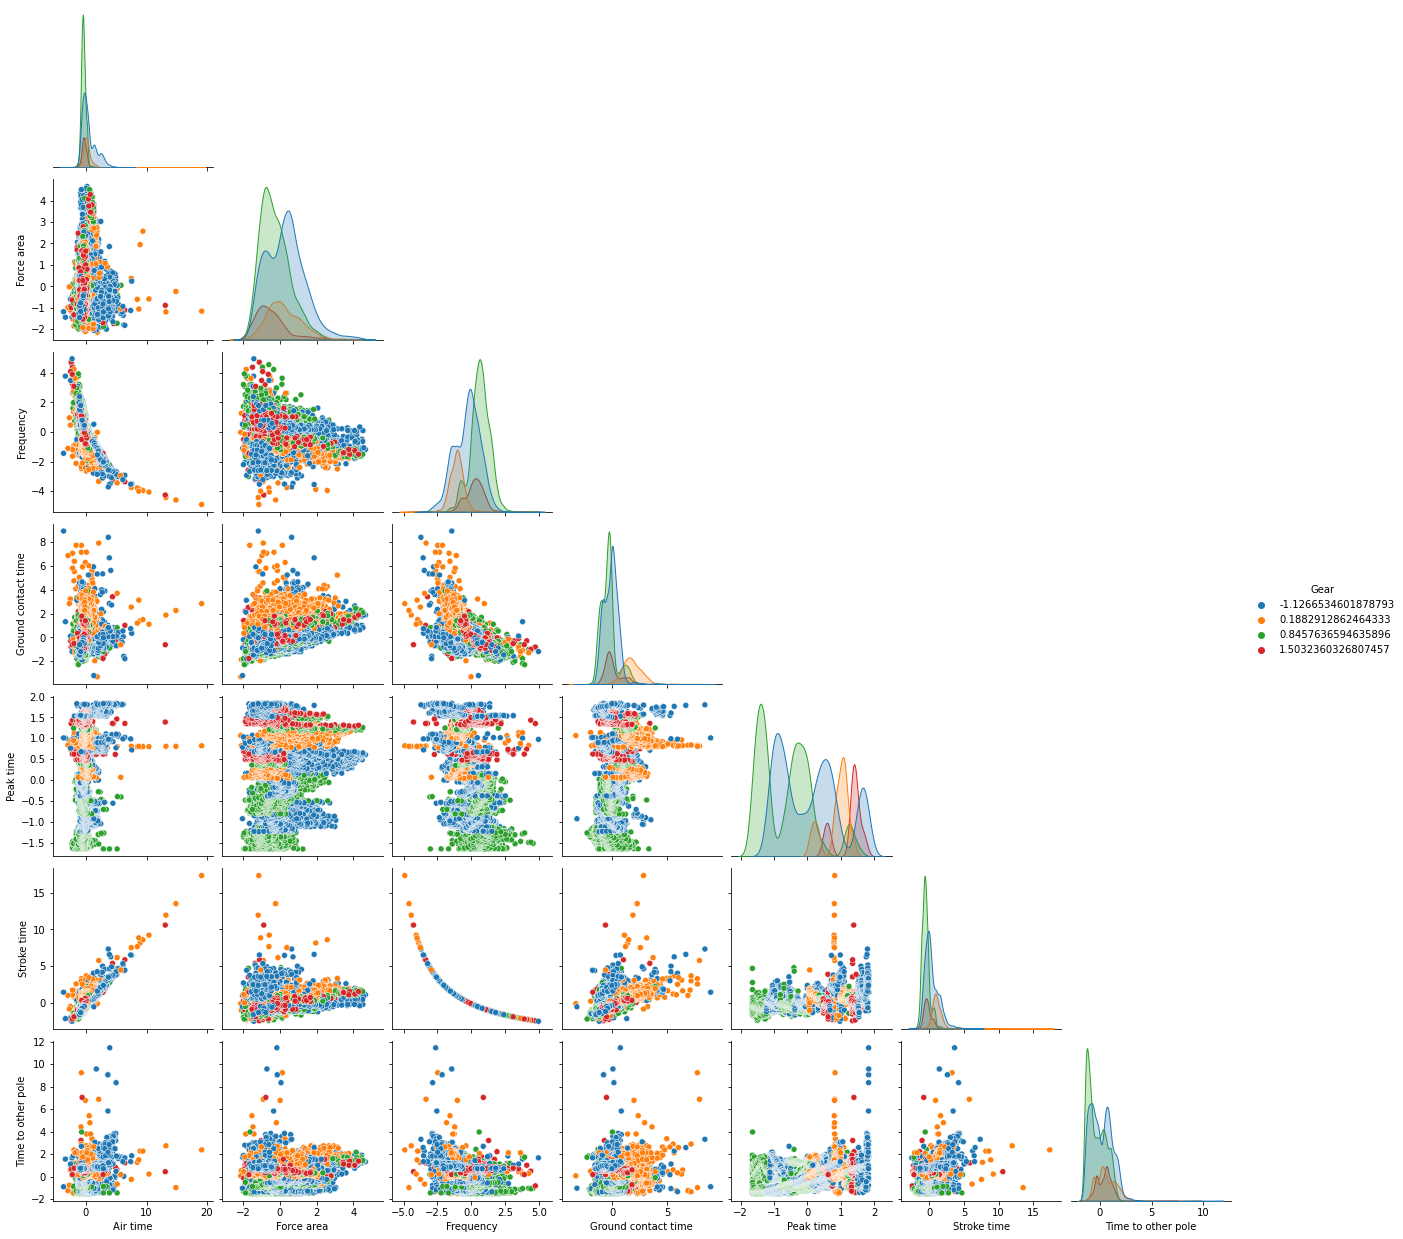

In [236]:
sns.pairplot(data[data.columns.difference(['Other pole index', 'Pole', 'Skier'])],
             hue="Gear", corner=True, palette="tab10")

---
---
---
# RANDOM FOREST CLASSIFIER
---

In [177]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn import metrics
from imblearn.combine import SMOTETomek

In [242]:
path_first = "../matlab_report-master/Treadmill/Test/Torsby/"
skier_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
path_second = "/CSV/csvData.csv"
filepath_list = [path_first + str(i) + path_second for i in skier_list]

main_df, df_peaks, df_info = get_dataframe(filepath_list, skier_list)

In [192]:
X = df_info[df_info.columns.difference(['Skier','Pole', 'Other pole index', 'Gear','Peak time'])]
y = (df_info['Gear'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(13768, 6) (3443, 6) (13768,) (3443,)


In [193]:
Counter(y_valid)

Counter({4: 287, 3: 1326, 0: 1443, 2: 387})

#### Run below cell only if you want to COMPLETELY exclude a few skiers from training data and use them for validation directly

In [243]:
# No. of Skiers to use for testing
validation_skiers = 3

X = df_info[df_info.columns.difference(['Pole', 'Other pole index', 'Gear','Peak time'])]
y = (df_info[['Gear','Skier']])

X_train = X.loc[(X['Skier'] <= (len(skier_list) - validation_skiers))]
X_valid = X.loc[(X['Skier'] > (len(skier_list) - validation_skiers))]
y_train = y.loc[(y['Skier'] <= (len(skier_list) - validation_skiers))]
y_valid = y.loc[(y['Skier'] > (len(skier_list) - validation_skiers))]

X_train = X_train[X_train.columns.difference(['Skier'])]
X_valid = X_valid[X_valid.columns.difference(['Skier'])]
y_train = y_train[y_train.columns.difference(['Skier'])]
y_train = y_train.values.ravel()
y_valid = y_valid[y_valid.columns.difference(['Skier'])]
y_valid = y_valid.values.ravel()

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(12108, 6) (5103, 6) (12108,) (5103,)


#### Run Below Cell only if you want to run SMOTE-Tomek Balanced data

In [182]:
# As we have seen above, the validation and training dataset are unbalanced, which needs to be balanced as below:

# Using SMOTE Tomek in conjunction to perform oversampling using SMOTE and then undersampling using Tomek.
smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X_train, y_train)
X_smv, y_smv = smt.fit_sample(X_valid, y_valid)

print('{} : Training Dataset'.format(Counter(X_smt)))
print('{} : Training Dataset'.format(Counter(X_smv)))
print('{} : Test Dataset'.format(Counter(y_smt)))
print('{} : Test Dataset'.format(Counter(y_smv)))

X_train = X_smt
y_train = y_smt
X_valid = X_smv
y_valid = y_smv

df = pd.DataFrame(X_train)
dv = pd.DataFrame(X_valid)

Counter({'Air time': 1, 'Force area': 1, 'Frequency': 1, 'Ground contact time': 1, 'Stroke time': 1, 'Time to other pole': 1}) : Training Dataset
Counter({'Air time': 1, 'Force area': 1, 'Frequency': 1, 'Ground contact time': 1, 'Stroke time': 1, 'Time to other pole': 1}) : Training Dataset
Counter({2: 5693, 4: 5627, 0: 5261, 3: 5227}) : Test Dataset
Counter({2: 1400, 4: 1373, 3: 1242, 0: 1241}) : Test Dataset


In [219]:
# Specifiying the range of Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 6, stop = 120, num = 6)]
#n_estimators = [10]

# Specifying the range of Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_depth.append(None)

# Specifying the range of Minimum number of samples required to split a node
min_samples_split = [1, 2, 4, 6]
#min_samples_split = [4]

# Specifying the range of Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
#min_samples_leaf = [2]

# Specifying the Method of selecting samples for training each tree
bootstrap = [True, False]
#bootstrap = [True]

# Specifying the Class weight
class_weight = ['balanced', 'balanced_subsample']

# Now, we create the random grid that would store all the values as specified above
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'class_weight' : class_weight
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'class_weight': ['balanced', 'balanced_subsample'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [1, 2, 4, 6],
 'n_estimators': [6, 28, 51, 74, 97, 120]}


In [220]:
# Now, using the random grid created above, we start to search for the best hyperparameters

# First we create the base model that we want to tune by specifying no parameters
rf = RandomForestClassifier()

#scoring_accuracy = 'balanced_accuracy'
#scoring_accuracy = 'roc_auc'

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='balanced_accuracy', 
                              cv = 3, verbose=2,
                               # random_state=42,
                               n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.1min finished


In [221]:
rf_random.best_params_

{'n_estimators': 97,
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_depth': 50,
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [222]:
rf_random.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=50,
                       min_samples_leaf=6, min_samples_split=6,
                       n_estimators=97)

In [223]:
# Build the Random Forest Classifier model
#rfc = RandomForestClassifier()

#best_grid = grid_search.best_estimator_

rfc = rf_random.best_estimator_

# Fit the model
rfc.fit(X_train, y_train)

sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                 max_depth=50,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 n_estimators=97))

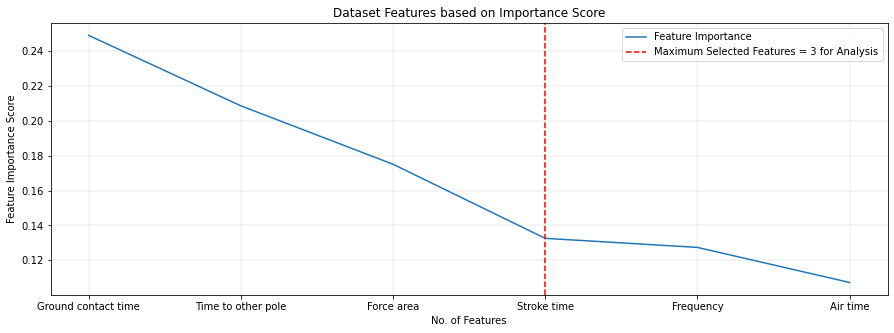

Accuracy Score: 0.7557362765030496
F-1 Score: 0.7608149647648281
MCC Score: 0.8618858461629322
Mean Absolute Error: 0.5721754284054603
Mean Squared Error: 1.618356084809759
Root Mean Squared Error: 1.2721462513444588
Classifier Score: 0.8184722625617195

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1443
           2       0.64      0.87      0.74       387
           3       0.78      0.76      0.77      1326
           4       0.45      0.59      0.51       287

    accuracy                           0.76      3443
   macro avg       0.68      0.74      0.71      3443
weighted avg       0.77      0.76      0.76      3443



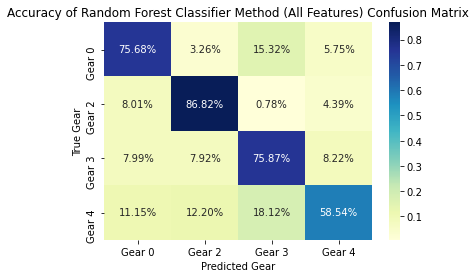

In [226]:
X_valid = X_test
y_valid = y_test

# Save the Feature Importances sorted by their score
imp_score = np.array(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), pd.DataFrame(X_train).columns.values), reverse=True))

#imp_features = 15
imp_features = int((np.count_nonzero(sel.get_support())))
#imp_features = 3

fig = plt.figure(figsize=(15, 5))

plt.plot(list(imp_score[:,1]),list(imp_score[:,0].astype(float)), label='Feature Importance')
#plt.xticks(,list(imp_score[:,1]))
plt.axvline(imp_features, color='r', linestyle='--', label='Maximum Selected Features = {} for Analysis'.format(imp_features))
plt.xlabel("No. of Features")
plt.ylabel("Feature Importance Score")
plt.title("Dataset Features based on Importance Score")
plt.legend(loc='best')
plt.grid(True,linewidth=0.25)
#plt.gcf()
#plt.savefig('RFC Feature Selection Plot', bbox_to_anchor='tight')
plt.show()
#plt.close()

# Predict Values using all the features, without reduction
#all_y_pred = rfc.predict(X_valid)

# Build the k-fold cross-validator
kfold = KFold(n_splits=5)
all_y_pred = cross_val_predict(rfc, X_valid, y_valid, cv=kfold)


results = np.ndarray(shape=(1,11))

CM_arr = metrics.confusion_matrix(y_valid, all_y_pred)

TP = CM_arr[0][0]                                                                                          # True Positives
FN = CM_arr[0][1]                                                                                          # False Positives
FP = CM_arr[1][0]                                                                                          # True Negatives
TN = CM_arr[1][1]                                                                                          # False Negatives

results[0][0] = metrics.accuracy_score(y_valid, all_y_pred) #Accuracy
results[0][1] = TP/(TP+FN)   #Sensitivity/Recall/True positive rate (TPR)
results[0][2] = TN/(FP+TN)                                                                         # True negative rate
results[0][3] = FP/(FP+TN)                                                                         # False positive rate
results[0][4] = TP/(TP+FP)
results[0][5] = metrics.f1_score(y_valid, all_y_pred, average='weighted')
results[0][6] = ((TP*TN)-(FP*FN))/(np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN)))
results[0][7] = metrics.mean_absolute_error(y_valid, all_y_pred)
results[0][8] = metrics.mean_squared_error(y_valid, all_y_pred)
results[0][9] = np.sqrt(metrics.mean_squared_error(y_valid, all_y_pred))
results[0][10] = rfc.score(X_valid,y_valid)

print('Accuracy Score:', results[0][0])
print('F-1 Score:', results[0][5])
print('MCC Score:', results[0][6])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, all_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, all_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, all_y_pred)))
print('Classifier Score:', rfc.score(X_valid,y_valid))

print('\nClassification Report: \n', metrics.classification_report(y_valid, all_y_pred))


file_prefix = 'Accuracy of Random Forest Classifier Method (All Features) '
#temp_labels = ['Gear ' + str(list(Counter(y_valid).keys())[i]) for i in range(0,len(list(Counter(y_valid).keys())))]
temp_labels = ['Gear 0', 'Gear 2', 'Gear 3', 'Gear 4']

x = np.true_divide(CM_arr, CM_arr.sum(axis=1, keepdims=True))

plt.figure()
sns.heatmap(x, annot=True,fmt='0.2%', xticklabels=temp_labels, yticklabels=temp_labels, cmap='YlGnBu')
plt.title('{}Confusion Matrix'.format(file_prefix))
plt.xlabel("Predicted Gear")
plt.ylabel("True Gear")
#plt.gcf()
#plt.savefig('{}_Confusion Matrix'.format(file_prefix), bbox_to_anchor='tight')
plt.show()
#plt.close()


In [225]:
pd.DataFrame(imp_score)

,0,1
0,0.249,Ground contact time
1,0.2086,Time to other pole
2,0.1751,Force area
3,0.1326,Stroke time
4,0.1274,Frequency
5,0.1073,Air time


In [172]:
Counter(all_y_pred)

Counter({2: 497, 3: 1270, 0: 1271, 4: 405})

In [174]:
Counter(y_valid)

Counter({2: 387, 3: 1326, 0: 1443, 4: 287})

In [111]:
X_valid

,Air time,Force area,Frequency,Ground contact time,Stroke time,Time to other pole
11112,0.761829,52.937381,0.748610,0.573980,1.335809,0.187848
7860,0.689607,26.322375,1.042260,0.269846,0.959453,0.319818
1627,0.810000,16.739675,0.819672,0.410000,1.220000,0.130000
6479,0.740044,23.941652,0.787354,0.530032,1.270076,0.550033
15494,1.140776,13.379229,0.661801,0.370252,1.511027,0.460313
...,...,...,...,...,...,...
6823,0.680041,14.595356,0.961481,0.360022,1.040062,0.500030
6353,0.630038,14.054840,1.149356,0.240014,0.870052,0.430026
5213,0.520031,24.083088,1.149356,0.350021,0.870052,0.170010
4778,0.749565,43.052676,0.862569,0.409762,1.159328,0.379780


---
---
---
# Multiclass Logistic Regression
---

### Hyperparameter Tuning for Logistic Regression

In [237]:
# Create regularization penalty space
penalty = ['l1', 'l2', 'elasticnet']
#penalty = ['l1']

# Specify if Dual or primal formulation
dual=[True,False]

# Create regularization hyperparameter space
C = np.logspace(0, 2.5, 15)

# define grid for different class weights
#balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]
#balance.append('balanced')
balance=['balanced']

#Specify the solver
#solver = ['saga']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Specifying the range of maximum oterations to enable convergence
#max_iter = np.linspace(100, 1000, 10).astype(int)
max_iter = [10000]

param_grid = dict(dual=dual, class_weight=balance, C=C, solver=solver, penalty=penalty, max_iter=max_iter)
print(param_grid)

{'dual': [True, False], 'class_weight': ['balanced'], 'C': array([  1.        ,   1.50859071,   2.27584593,   3.43332002,
         5.17947468,   7.81370738,  11.78768635,  17.7827941 ,
        26.82695795,  40.47089951,  61.05402297,  92.10553177,
       138.94954944, 209.61799925, 316.22776602]), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'max_iter': [10000]}


In [238]:
# Now, using the random grid created above, we start to search for the best hyperparameters

# First we create the base model that we want to tune by specifying no parameters
lr = LogisticRegression()

lr_random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid,
                               n_jobs=-1, scoring='balanced_accuracy', cv = 3,
                              return_train_score=True)

#lr_random_result = lr_random.fit(X_train, y_train)
lr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([  1.        ,   1.50859071,   2.27584593,   3.43332002,
         5.17947468,   7.81370738,  11.78768635,  17.7827941 ,
        26.82695795,  40.47089951,  61.05402297,  92.10553177,
       138.94954944, 209.61799925, 316.22776602]),
                                        'class_weight': ['balanced'],
                                        'dual': [True, False],
                                        'max_iter': [10000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   return_train_score=True, scoring='balanced_accuracy')

In [239]:
# Now, we will return the best performing parameters from the above Randomized Search.
# This will help us finetune the hyperparameters better for effective feature selection.
lr_random.best_params_

{'solver': 'saga',
 'penalty': 'l2',
 'max_iter': 10000,
 'dual': False,
 'class_weight': 'balanced',
 'C': 1.5085907086001784}

Accuracy Score: 0.675289045659416
F-1 Score: 0.6902859364157733
MCC Score: 0.867011255469355
Mean Absolute Error: 0.7356456986086616
Mean Squared Error: 2.063883989809916
Root Mean Squared Error: 1.4366224242332832
Classifier Score: 0.6825396825396826
Sensitivity: 0.9490358126721763
Specificity: 0.9379699248120301

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.65      0.75      2133
           2       0.63      0.87      0.73       571
           3       0.72      0.63      0.67      1956
           4       0.33      0.78      0.46       443

    accuracy                           0.68      5103
   macro avg       0.64      0.73      0.65      5103
weighted avg       0.74      0.68      0.69      5103



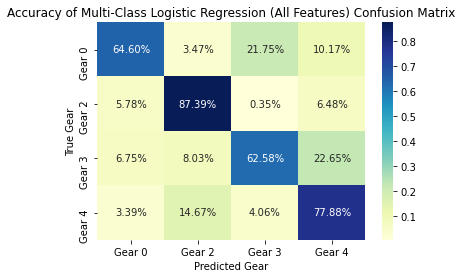

In [263]:
# Build the Random Forest Classifier model

lr_best_random = lr_random.best_estimator_

lr = lr_best_random

# Fit the model
lr.fit(X_train, y_train)


# Predict Values using all the features, without reduction
lr_all_y_pred = lr.predict(X_valid)

# Build the k-fold cross-validator
kfold = KFold(n_splits=5)
lr_all_y_pred = cross_val_predict(lr, X_valid, y_valid, cv=kfold)




lr_results = np.ndarray(shape=(1,11))

lr_CM_arr = metrics.confusion_matrix(y_valid, lr_all_y_pred)

TP = lr_CM_arr[0][0]                                                                                          # True Positives
FN = lr_CM_arr[0][1]                                                                                          # False Positives
FP = lr_CM_arr[1][0]                                                                                          # True Negatives
TN = lr_CM_arr[1][1]                                                                                          # False Negatives

lr_results[0][0] = metrics.accuracy_score(y_valid, lr_all_y_pred) #Accuracy
lr_results[0][1] = TP/(TP+FN)   #Sensitivity/Recall/True positive rate (TPR)
lr_results[0][2] = TN/(FP+TN)                                                                         # True negative rate
lr_results[0][3] = FP/(FP+TN)                                                                         # False positive rate
lr_results[0][4] = TP/(TP+FP)
lr_results[0][5] = metrics.f1_score(y_valid, lr_all_y_pred, average='weighted')
lr_results[0][6] = ((TP*TN)-(FP*FN))/(np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN)))
lr_results[0][7] = metrics.mean_absolute_error(y_valid, lr_all_y_pred)
lr_results[0][8] = metrics.mean_squared_error(y_valid, lr_all_y_pred)
lr_results[0][9] = np.sqrt(metrics.mean_squared_error(y_valid, lr_all_y_pred))
lr_results[0][10] = lr.score(X_valid,y_valid)

print('Accuracy Score:', lr_results[0][0])
print('F-1 Score:', lr_results[0][5])
print('MCC Score:', lr_results[0][6])

print('Mean Absolute Error:', lr_results[0][7])
print('Mean Squared Error:', lr_results[0][8])
print('Root Mean Squared Error:', lr_results[0][9])
print('Classifier Score:', lr_results[0][10])
print('Sensitivity:', lr_results[0][1])
print('Specificity:', lr_results[0][2])

print('\nClassification Report: \n', metrics.classification_report(y_valid, lr_all_y_pred))


file_prefix = 'Accuracy of Multi-Class Logistic Regression (All Features) '
#temp_labels = ['Gear ' + str(list(Counter(y_valid).keys())[i]) for i in range(0,len(list(Counter(y_valid).keys())))]
temp_labels = ['Gear 0', 'Gear 2', 'Gear 3', 'Gear 4']

x = np.true_divide(lr_CM_arr, lr_CM_arr.sum(axis=1, keepdims=True))

plt.figure()
sns.heatmap(x, annot=True,fmt='0.2%', xticklabels=temp_labels, yticklabels=temp_labels, cmap='YlGnBu')
plt.title('{}Confusion Matrix'.format(file_prefix))
plt.xlabel("Predicted Gear")
plt.ylabel("True Gear")
#plt.gcf()
#plt.savefig('{}_Confusion Matrix'.format(file_prefix), bbox_to_anchor='tight')
plt.show()
#plt.close()

In [268]:
Counter(lr_all_y_pred)

Counter({3: 1708, 4: 1042, 2: 795, 0: 1558})

In [267]:
Counter(y_valid)

Counter({3: 1956, 0: 2133, 2: 571, 4: 443})

<AxesSubplot:>

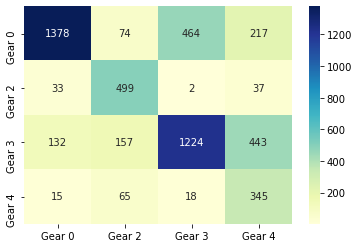

In [269]:
sns.heatmap(lr_CM_arr, annot=True,fmt='0.0f', xticklabels=temp_labels, yticklabels=temp_labels, cmap='YlGnBu')

In [271]:
lr_best_random.coef_.T

array([[ 5.54030611, -4.41739312,  0.25890139, -1.38181438],
       [ 0.05634785, -0.02843805,  0.02043534, -0.04834514],
       [ 0.60739775, -5.35922161,  3.97411895,  0.77770492],
       [-7.5405906 ,  9.04461219, -3.03533075,  1.53130915],
       [-2.00028449,  4.62721907, -2.77642936,  0.14949477],
       [ 0.02425404,  1.5563333 , -2.49360554,  0.91301819]])

---
---
---
# Other Miscellaneous Techniques
---


In [276]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import fcluster
from fitter import Fitter
from scipy import stats
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics import silhouette_samples, silhouette_score

In [277]:
#Calculate k-means on original data with all variables
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)


labels = kmeans.predict(X_valid)
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[0 0 0 ... 3 0 0]
[[ 0.76836881 16.43120782  0.94775054  0.32446236  1.09283117  0.29264244]
 [ 0.82599063 61.93951596  0.78570103  0.47383881  1.29982944  0.41028528]
 [ 0.77900629 42.71060495  0.85507177  0.40721895  1.18622524  0.26302287]
 [ 0.7723666  29.46968452  0.88420851  0.38350623  1.15587283  0.2856305 ]]


In [279]:
#Create a Hierarchical Clustering and use dendograms for the same Dataset
clusters = 4
Z = linkage(X_train, 'ward')
dendo_clusters = fcluster(Z, clusters, criterion='maxclust')

# calculate full dendrogram
plt.figure(figsize=(17, 5))
plt.title('Hierarchical Clustering Dendrogram', pad=20)
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.gcf()
#plt.savefig('Samp-{}_TotalFeat-{}_Relevant-{}_Irrelevant-{}_DENDOGRAM'.format(samples,total_features,info_features,redun_features), bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

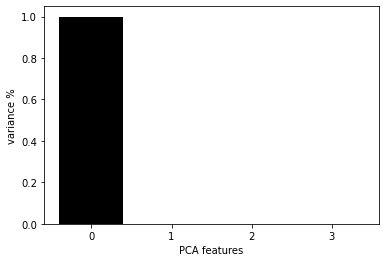

In [282]:
# Create a PCA instance: pca
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_train)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

ValueError: 'c' argument has 5103 elements, which is inconsistent with 'x' and 'y' with size 12108.

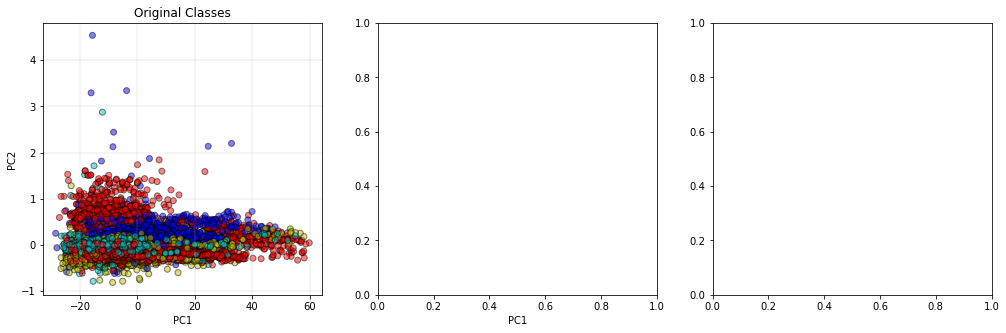

In [283]:
#Creating the color map 
colmap = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c'}

#Mapping colors based on original classification
colors_Orig = map(lambda x: colmap[x], y_train)
colors_Orig = list(colors_Orig)

#Mapping colors based on k-means on PCA
colors_kMeans = map(lambda x: colmap[x], labels)
colors_kMeans = list(colors_kMeans)

#Mapping colors based on Hierarchical Clustering
#colors_dendo = map(lambda x: colmap[x-1], dendo_clusters)
#colors_dendo = list(colors_dendo)

fig, axs = plt.subplots(1,3, sharex=False, sharey=False, figsize=(17, 5))
#fig.suptitle('Samples: {} || Total Features: {} -> Relevant: {} Irrelevant: {}'.format(samples,total_features,info_features,redun_features))

axs[0].set_xlabel("PC1")
axs[0].scatter(PCA_components[0], PCA_components[1], color=colors_Orig, alpha=0.5, edgecolor='k')
axs[0].set_title("Original Classes")
axs[0].grid(True,linewidth=0.25)
axs[0].set_ylabel("PC2")

axs[1].set_xlabel("PC1")
axs[1].scatter(PCA_components[0], PCA_components[1], color=colors_kMeans, alpha=0.5, edgecolor='k')
axs[1].set_title("k-means on all variables")
axs[1].grid(True,linewidth=0.25)

#axs[2].set_xlabel("PC1")
#axs[2].scatter(PCA_components[0], PCA_components[1], color=colors_dendo, alpha=0.5, edgecolor='k')
#axs[2].set_title("Hierarchical on all variables")
#axs[2].grid(True,linewidth=0.25)

#fig.savefig('Samp-{}_TotalFeat-{}_Relevant-{}_Irrelevant-{}_GRID'.format(samples,total_features,info_features,redun_features), bbox_inches='tight')